# Assignment 2: Statistical Learning & Sound Event Classification Fundamentals

CS-GY 9223: Machine Listening

Below you will find a mix of coding questions and writing questions to familiarize you with the fundamentals of signal processing in Python.

**Read through the text, code, and comments carefully and fill-in the blanks accordingly. Written questions will be denoted with❓, and code questions will be explained in code comments, both with "TODO" markers. Code fill-ins will also often have templated "Nones" where you'll fill in that part. It will be specified whether you should write your code from scratch or use a built-in method.**

**For all plots, include axis labels with units of measurement when applicable. Lack of this will result in small points deductions.**

The assignment will be 10 points total (possibility of +2 points extra credit). Each code and text question is labeled with fractional point values.

### ⚠️ Before you begin - Python packages⚠️
For this assignment you will need Pandas (`pip install pandas`), tqdm (`pip install tqdm`), scikit-learn, and librosa in addition to matplotlib and numpy (which you should have from the first assignment). If you don't have all of these already in your environment/Conda environment, open your terminal, activate your Conda environment, and `pip install <package>` from there *before* launching `jupyter notebook` from within that environment. Then, when you launch the notebook and go to select your kernel, that environment will now have those packages installed

# Part 1: Warming up machine learning fundamentals [2 pts]

In this section you will use a simple dataset to explore data splitting, pre-processing and machine learning model selection. 

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import librosa
from tqdm import tqdm
import os
import IPython.display as ipd

### 1.1 Loading data and basic manipulations 🐧 [0.5 pts]
Download the awesome **penguins** dataset from this link: https://github.com/mwaskom/seaborn-data/blob/71e2436a092d714350de0fc409ca8a8714e7e78f/penguins.csv as a CSV file.

The dataset consists of 7 columns:

* `species`: penguin species (Chinstrap, Adélie, or Gentoo)
* `island`: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* `bill_length_mm`: bill length (mm)
* `bill_depth_mm`: bill depth (mm)
* `flipper_length_mm`: flipper length (mm)
* `body_mass_g`: flipper length (mm)
* `sex`: penguin sex





In [11]:
# TODO : Load the dataset into a Pandas DataFrame [0.1 pt]
# TODO : Print the first 5 rows of the dataset using df.head()

df = pd.read_csv('penguins.csv')
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [13]:
# TODO : Filter out rows that have any NaN values. [0.05 pt]
# TODO : Print the number of samples in the dataset before and after filtering
df_filtered = df.dropna()
df_filtered.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [21]:
# TODO : Print the number of samples per species [0.05 pt]
count_per_species = df_filtered.groupby('species')
print(count_per_species.size())

species
Adelie       146
Chinstrap     68
Gentoo       119
dtype: int64


In [39]:
# TODO : Create a DataFrame of the mean flipper length by species and sex within each species and display it [0.1 pt]
df_mean_flipper = df.groupby(['species', 'sex'])['flipper_length_mm'].mean().reset_index()
df_mean_flipper.rename(columns={'flipper_length_mm': 'mean_flipper_length_mm'}, inplace=True)

df_mean_flipper

,species,sex,mean_flipper_length_mm
0,Adelie,FEMALE,187.794521
1,Adelie,MALE,192.410959
2,Chinstrap,FEMALE,191.735294
3,Chinstrap,MALE,199.911765
4,Gentoo,FEMALE,212.706897
5,Gentoo,MALE,221.540984


In [46]:
# TODO : Add a column to the original DataFrame that maps the 3 species types to the labels [0,1,2] [0.1 pt]
# Name this column "species_label"
# TODO : Print the first 5 rows of the updated DataFrame
species_label = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
df_filtered.loc[:,'species_label'] = df_filtered['species'].map(species_label)
df_filtered.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_label
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0


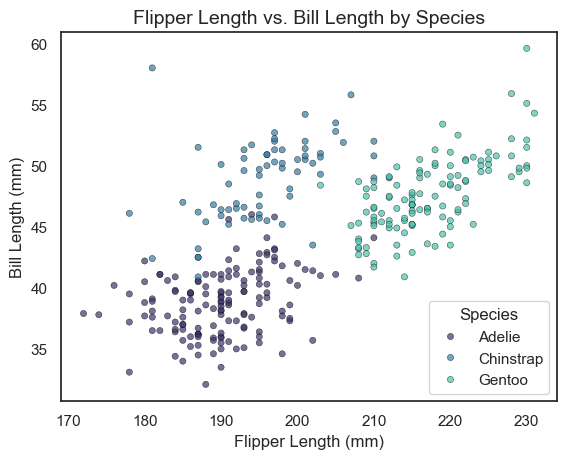

In [74]:
# TODO : Exploratory data plot using matplotlib or seaborn [0.1 pt]
# Plot a scatter plot with flipper length on the x-axis, bill-length on the y-axis, colored by species


sns.set_theme(style="white")

sns.scatterplot(
    data=df_filtered,
    x='flipper_length_mm',
    y='bill_length_mm',
    hue='species',
    palette='mako',      # Choose a friendly color palette (Set1, Set2, tab10, etc.)
    edgecolor='black',   # Black border around markers (optional)
    alpha=0.7,           # Slight transparency
    s=20,               # Size of the markers
)

# Add a title and custom axis labels
plt.title('Flipper Length vs. Bill Length by Species', fontsize=14)
plt.xlabel('Flipper Length (mm)', fontsize=12)
plt.ylabel('Bill Length (mm)', fontsize=12)

# Move the legend for clarity (optional)
plt.legend(title='Species', loc='best')

# Display the plot
plt.show()

### 1.2 Data preprocessing and splitting [0.5 pts]
You will use flipper length and bill length as your continuous features, and species as your target (but use `species_label`) for training your model. First you will split the data into a training and testing set. After splitting the data, we need to normalize or standardize the data in some way because the scale of data across features differs, use **min-max normalization**, defined as $x' = \frac{x - min(x)}{max(x) - min(x)}$. Write min-max normalization by hand here, ⚠️**do not use a built-in function**⚠️.

Calculate the minimum and maximum value *per feature* across the training dataset, and then apply this formula to every sample, using those min/max values. **You will also use these normalization values in validation and test!**



In [80]:
# TODO : Assign your feature data , which should be a numpy array size (333,2) to `X` [0 pt]
# TODO : Assign your target data to `y`, which should be a numpy array shape (333,)
X = df_filtered[['flipper_length_mm', 'bill_length_mm']].values

y = df_filtered['species_label'].values


# TODO : Split your data into training and test sets using scikit-learn's train_test_split [0.1 pt]
# We will use cross validation to internally split the training set into train-val.
# Use 80% of your data for train, 20% for test
# Hint: pass `stratify=y` to make sure your splits are balanced in terms of species class
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,    # 20% test, 80% train
    stratify=y,       # Ensures balanced splits across species
    random_state=42   # Fix the seed for reproducibility (optional)
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# TODO : Use the training data statistics to min-max normalize each feature [0.4 pts]
# First calculate the statistics per feature on the training set
# Important! Normalize the test features by the statistics from the training set

# 1. Compute the min/max for flipper_length and bill_length on the TRAINING set
min_flipper = X_train[:, 0].min()
max_flipper = X_train[:, 0].max()

min_bill = X_train[:, 1].min()
max_bill = X_train[:, 1].max()

# 2. Normalize training features using the training-set stats
flipper_norm_train = (X_train[:, 0] - min_flipper) / (max_flipper - min_flipper)
bill_norm_train = (X_train[:, 1] - min_bill) / (max_bill - min_bill)

# 3. Normalize test features using the SAME training-set stats (NO recalculation)
flipper_norm_test = (X_test[:, 0] - min_flipper) / (max_flipper - min_flipper)
bill_norm_test = (X_test[:, 1] - min_bill) / (max_bill - min_bill)

# 4. Reassemble columns into final X_train_norm, X_test_norm
X_train_norm = np.column_stack((flipper_norm_train, bill_norm_train))
X_test_norm = np.column_stack((flipper_norm_test, bill_norm_test))


X_train shape: (266, 2)
X_test shape: (67, 2)
y_train shape: (266,)
y_test shape: (67,)


In [76]:
# TODO : Print the number of samples per class in each of the data splits [0 pt]
# Ensure that classes are proportionately balanced across splits
print("Training set class counts:")
print(pd.Series(y_train).value_counts(), "\n")

print("Test set class counts:")
print(pd.Series(y_test).value_counts())


Training set class counts:
0    117
2     95
1     54
Name: count, dtype: int64 

Test set class counts:
0    29
2    24
1    14
Name: count, dtype: int64


### 1.3 Basic model training and hyperparameter tuning [1 pt]
Now you'll be training a model to predict species given your features. 
You'll be using **[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**.
You can use the `scikit-learn` implementation of this model! The documentation provides helpful info on the parameters that you'll need to tweak for the experiments below.

We will be exploring the use of regularization weighting (lambda) **hyperparameter** as discussed in class. 
To select the best parameter for lambda, use **cross-validation** and get the accuracy score for each version of the model. Once you've found the best value for lambda, train one final model using those parameters and evaluate on the test set. 

For this exercise, you can write your own cross-validation and accuracy implementations, or use built-in functions from `scikit-learn`.

In [77]:
# TODO : Train a logistic regression model to predict penguin species (using scikit-learn!) [0.75 pts]
# TODO : Use 5-fold cross validation to find the best weight of regularization (lambda) in terms of mean accuracy
# Use penalty = 'l2'
# Print the accuracy of each model

lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty = 'l2'

best_lambda = None
best_mean_acc = 0.0

for lam in lambdas:
    # Convert lambda to sklearn's C (inverse regularization strength)
    C_value = 1 / lam
    
    # Create a Logistic Regression model with L2 penalty
    clf = LogisticRegression(C=C_value, penalty=penalty, max_iter=1000)
    
    # 5-fold cross-validation (using accuracy)
    scores = cross_val_score(clf, X_train_norm, y_train, cv=5, scoring='accuracy')
    mean_acc = scores.mean()
    
    # Print each model's mean accuracy
    print(f"Lambda: {lam}, C: {C_value:.3f}, Mean Accuracy: {mean_acc:.4f}")
    
    # Track the best lambda
    if mean_acc > best_mean_acc:
        best_mean_acc = mean_acc
        best_lambda = lam

print()
print(f"Best lambda: {best_lambda} with mean accuracy: {best_mean_acc:.4f}")

Lambda: 0.001, C: 1000.000, Mean Accuracy: 0.9510
Lambda: 0.01, C: 100.000, Mean Accuracy: 0.9510
Lambda: 0.1, C: 10.000, Mean Accuracy: 0.9509
Lambda: 1, C: 1.000, Mean Accuracy: 0.9321
Lambda: 10, C: 0.100, Mean Accuracy: 0.7821
Lambda: 100, C: 0.010, Mean Accuracy: 0.4964
Lambda: 1000, C: 0.001, Mean Accuracy: 0.4398

Best lambda: 0.001 with mean accuracy: 0.9510


In [78]:
# TODO : use your best-performing parameter of lambda to train a final model and evaluate on the normalized test set [0.25 pts]
# Print your test accuracy
# 1. Convert your best lambda to sklearn's C parameter
best_C = 1 / best_lambda

# 2. Create and train the final model on the full training set
final_model = LogisticRegression(
    C=best_C,
    penalty='l2',
    max_iter=1000, 
    random_state=42  # for reproducibility
)
final_model.fit(X_train_norm, y_train)

# 3. Evaluate on the normalized test set
test_accuracy = final_model.score(X_test_norm, y_test)

print(f"Best lambda: {best_lambda}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Best lambda: 0.001
Test Accuracy: 0.9552


# Part 2: Sound Event Classification with ESC-50 [8 pts]

Now that you've got a standard machine learning framework under your belt, let's do what you came here for: working with audio and designing *machine listening* systems!

You'll be working with a popular environmental sound classification dataset: **[ESC-50](https://github.com/karolpiczak/ESC-50)** for these experiments. We will walk through loading the data and get you more familiar with audio feature extraction and simple model training on real audio data, but with the same principles we used in Part 1.

A few notes about the ESC-50 data:
- 2000 x 5-second long audio recordings in .wav format, in the `audio/*.wav` folder
- original audio has 44.1 kHz sample rate, mono
- metadata can be found in `meta/esc50.csv`
    - `target` is the target class index, while `category` is the name of that class
    - `fold` contains predefined cross-validation folds. For our purposes, we'll use folds 1-3 for training, 4 for val, and 5 for test
    - you can ignore the `esc10` and `take` columns for this assignment


Begin by **downloading the data** [here](https://github.com/karolpiczak/ESC-50?tab=readme-ov-file#download) (~600mb). For more details on the structure of the data and metadata, see [the repository readme](https://github.com/karolpiczak/ESC-50).


### 2.1 Loading data and preliminary analysis [1 pt code + 0.4pts written = 1.4 pts]
First, we will take a look at the metadata and do some preliminary feature extraction to better-understand the features we'll use to train our sound event classifier in the next step.

In [4]:
# TODO : Load the metadata file into a Pandas dataframe and print the first 5 rows [0.05 pts]
data_path = "ESC-50-master/meta/esc50.csv" # define your path to ESC-50 directory
meta_df = pd.read_csv(data_path)
print(meta_df.head())


            filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A


Number of audio samples: 220500
Sample rate: 44100 Hz


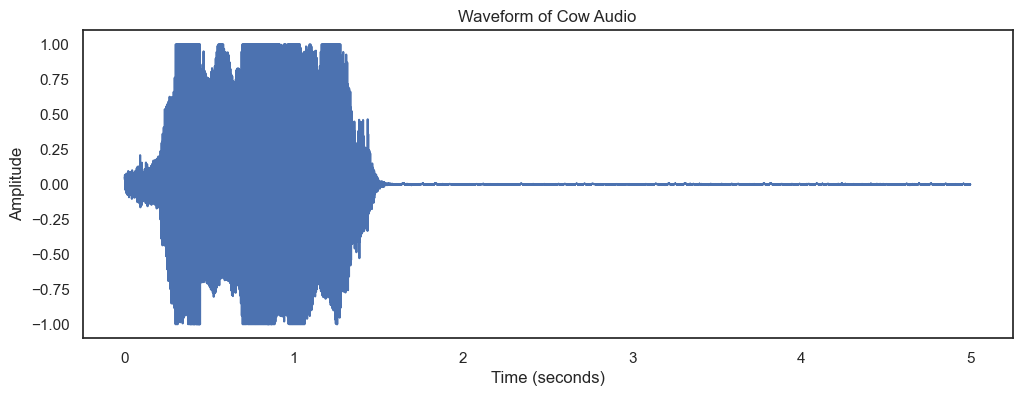

In [180]:
# TODO : Load an audio file from the `cow` class using Librosa. Use the native sample rate. [0.05 pts]
# TODO : Plot the waveform 
# TODO : Print the number of audio samples and the sample rate (bonus: plotting x-axis labels with time and not samples :) )
# TODO : Play the sample audio above 

cow = meta_df[meta_df["category"] == "cow"]["filename"].iloc[0]
audio_path = "ESC-50-master/audio/"+cow
y, sr = librosa.load(audio_path, sr=None)

print(f"Number of audio samples: {len(y)}")
print(f"Sample rate: {sr} Hz")

duration = len(y) / sr  # total duration in seconds
time = np.linspace(0, duration, len(y))

plt.figure(figsize=(12, 4))
plt.plot(time, y)
plt.title("Waveform of Cow Audio")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


ipd.Audio(data=y, rate=sr)

#### Spectrogram Exploration [0.9 pts]

TODO : Make a plot with 3 subplots: 
1. linear-frequency power spectrogram
2. log-frequency spectrogram
3. log-mel frequency spectrogram

Use `librosa` for computing features. You can use vanilla matplotlib `imshow` for plotting, or `librosa.display.specshow`. A few points to clarify: the `y_axis` parameter in `librosa.display.specshow` does **not** actually change the spectrogram data itself (e.g. if you pass "log", this is purely for visualization purposes). In fact, I recommend plotting your linear and log spectrograms both with log y-axis labeling for better comparison, so that you can really see the difference in your features - not just as an artifact of visualization. You can also pass `y_axis=mel` to `librosa.display.specshow` for the mel spectrogram plots.


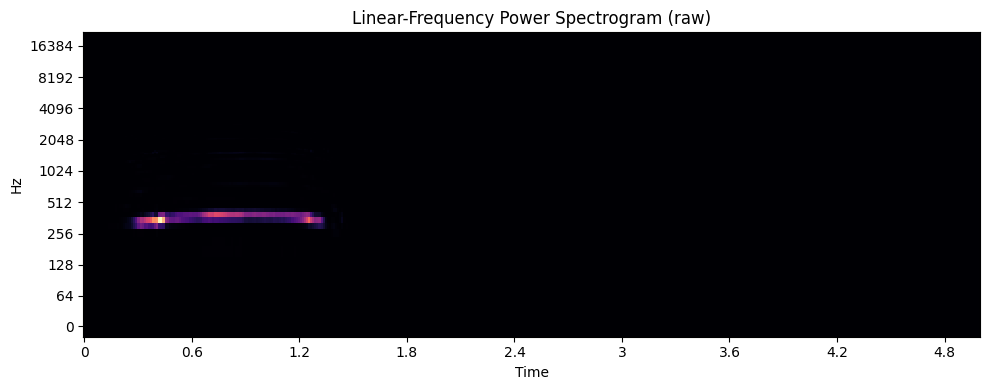

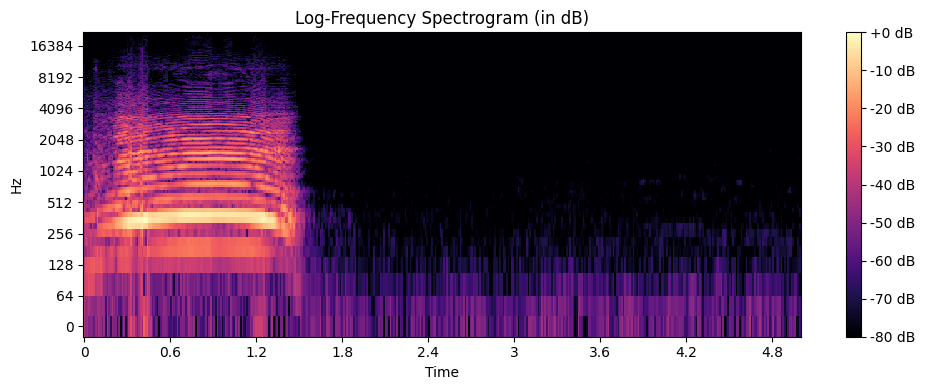

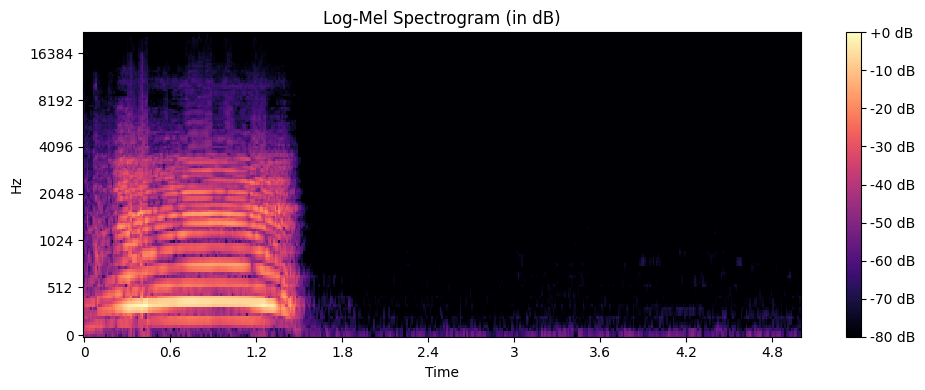

In [36]:
# TODO : Follow the instructions above to explore 3 types of spectrograms on your sample audio via plots [0.9 pts, 0.3 pts per feature/plot]
# Here are some initial window/hop sizes and n_mels, but in the next question you'll explore different options
win_length = 512
hop_length = 1024//2
n_mels = 128

D = librosa.stft(y, n_fft=win_length*2, hop_length=hop_length, window='hann')


S_power = np.abs(D)**2

S_dB = librosa.power_to_db(S_power, ref=np.max)


# TODO : define your spectrograms here
lin_power_spec = S_power
log_spec = S_dB

mel_spec = librosa.feature.melspectrogram(
                y=y,
                sr=sr,
                n_fft=win_length*2,
                hop_length=hop_length,
                n_mels=n_mels
            )

log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

# TODO : define your plots here

# 1) Linear-frequency spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    lin_power_spec, 
    sr=sr, 
    hop_length=hop_length,
    x_axis='time', 
    y_axis='log',  
    cmap='magma'
)
plt.title("Linear-Frequency Power Spectrogram (raw)")
#plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


# 2) Log-frequency spectrogram in dB
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    log_spec, 
    sr=sr, 
    hop_length=hop_length, 
    x_axis='time', 
    y_axis='log',  # log scale for frequency
    cmap='magma'
)
plt.title("Log-Frequency Spectrogram (in dB)")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()



# 3) Log-Mel spectrogram (dB)
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    log_mel_spec, 
    sr=sr, 
    hop_length=hop_length, 
    x_axis='time', 
    y_axis='mel',  # still Mel scale
    cmap='magma'
)
plt.title("Log-Mel Spectrogram (in dB)")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()




❓ 1. **[QUESTION]**
Experiment with a few different combinations of window lengths and hop lengths for the spectrograms above on your sample signal, using what you learned from the last assignment about the trade-offs between these parameters. Land on a combination you observe/hypothesize is best for this type of environmental sound data. Explain your parameter choices and how these choices impact the features you see in the plots. [0.2 pts]

**ANSWER:** Larger window lengths provide better time resolution but lower frequency resolution. A smaller hop length results in more overlap between windows, leading to smoother spectrograms but increased computational cost. A larger hop length reduces overlap, leading to less smooth spectrograms but lower computational cost. I have chosen a Window length of 512 and Hop Length of 512 since this can capture the variance in environmental noises such as sharp bird calls to sustained noise like traffic.


❓ 2. **[QUESTION]** 
Aside from your window and hop size choices, (1) what do you observe about the differences between the 3 types of spectrograms above (i.e. for one set of parameters)? Write about the differences you see (maybe also experiment with multiple audio files). (2) Which type of spectrogram do you think would be the best to use as features for training a sound event classifier and why? [0.2 pts]

**ANSWER:** The best one is Log-Mel Spectrogram. This is because the Mel scale with a log amplitude aligns well with human hearing. Also it its more compressed meaning quieter sounds are more apparent so its a more even spread of frequencies. 


### 2.2 Feature Extraction [2pts code + 0.2pts written = 2.2 pts]
Next, let's expand this feature extraction such that we can apply it to an entire data split and have a bit more flexibility. Complete the function below following the docstrings, for the three types of features we explored above.

Note that for this assignment, we will aggregate the 2D spectrogram features over time (either with mean or max), such that our features are 1D for model input.

In [37]:
# TODO : Complete this function below! [1.5 pts]
# Note that we'll do train/test splitting below, so you'll call this once per split with the pre-split filenames.
# Hint: use tqdm to see progress in a loop - `for audio_file in tqdm(audio_filepaths)` !

def get_esc_features(audio_filepaths, feature, sr=16000, aggregation="mean", hop_length=512, win_length=1024):
    """
    Process a list of audio files to extract specified features.
    You'll aggregate the features over time, by averaging or taking the max.
    
    Parameters:
    -----------
    audio_filepaths : list of str)
        List of paths to audio files.
    feature : str
        Feature type to extract. One of "lin_spec", "log_spec", "log_mel_spec".
    sr : int, optional
        Target sampling rate for resampling. Default is 16000.
    aggregation : str, optional 
        Aggregation method over time. Either "mean" or "max". Default is "mean".
    hop_length : int, optional
        Hop length for feature extraction. Default is 512.
    win_length : int, optional
        Window length for feature extraction. Default is 1024.
    
    Returns:
    -----------
        np.ndarray: A NumPy array of shape (n_files, n_features). n_features will differ based on feature type.
    """
    feature_list = []
    
    for audio_file in tqdm(audio_filepaths):
               
        # Load and resample audio to sr
        y, sr = librosa.load(audio_file, sr=sr)
        
        # Extract features depending on 'feature' arg

        if(feature == 'lin_spec'):
            
            D = librosa.stft(y, n_fft=win_length*2, hop_length=hop_length, window='hann')
            S_power = np.abs(D)**2

            feature_mat = S_power

        elif(feature == 'log_spec'):
            D = librosa.stft(y, n_fft=win_length*2, hop_length=hop_length, window='hann')
            S_power = np.abs(D)**2
            S_dB = librosa.power_to_db(S_power, ref=np.max)

            feature_mat = S_dB
            

        elif(feature == 'log_mel_spec'):
            mel_spec = librosa.feature.melspectrogram(
                y=y,
                sr=sr,
                n_fft=win_length*2,
                hop_length=hop_length,
                n_mels=n_mels
            )

            feature_mat = librosa.power_to_db(mel_spec, ref=np.max)
            
        
        # Aggregate over time depending on 'aggregation' arg

        if aggregation == 'mean':
            feature_vect = np.mean(feature_mat,axis = 1)
        elif aggregation == 'max':
            feature_vect = np.max(feature_mat, axis = 1)

        pass
        
        feature_list.append(feature_vect)
    
    return np.array(feature_list)

In [38]:
# TODO : Use get_esc_features with the parameters below to get each feature for 10 samples [0.5 pts overall]
# TODO : replace this with your data path path
data_path = 'ESC-50-master/' 

# TODO : Just demo on 10 files
data_chunk = [os.path.join(data_path, f"audio/{i}") for i in list(meta_df['filename'])][:10] 

# params for spec computation
resample_sr = 16000
agg_type = "mean"
hop_len = 512
win_len = 1024

# call your function here
lin_spec_ft  = get_esc_features(data_chunk,'lin_spec') 
log_spec_ft  = get_esc_features(data_chunk,'log_spec') 
log_mel_spec_ft  = get_esc_features(data_chunk,'log_mel_spec') 


# Test your output shape 
assert lin_spec_ft.shape == (10,1025) 
assert log_spec_ft.shape == (10,1025)
assert log_mel_spec_ft.shape == (10, 128)


100%|██████████| 10/10 [00:00<00:00, 92.66it/s]


❓ 3. **[QUESTION]** 
(1) Explain the intuition behind using either 'mean' or 'max' temporal aggregation on a spectrogram. (2) Which do you think would be most effective for sound event classification? [0.2 pts]

**ANSWER:** Mean temporal aggregation takes the average amplitude in each bin capturing the overall spectral content and smoothing out spikes. Max pooling records the max amplitude at each frequency bin. The most effective is max pooling since environmental sounds often are short and pronounced, max pooling will effectively capture such events whilst mean pooling may miss them. 

#### 🍬 Extra Credit (0.5 pts) 
Add another signal-processing based feature to the function above, and to the tests! This could even be something we haven't talked about a lot in class. Check out Librosa's [feature extraction library](https://librosa.org/doc/main/feature.html). There are tons of super interesting spectral features to explore. Write about the feature you chose and why you think it will be helpful for environmental sound classification.


### 2.3 Data Splitting [0.5 pts]
Next, let's set up our **train/validation/test** splits. Use folds 1-3 for training, 4 for validation, and 5 for testing.

Split the data into training and test lists of audio files (`X`) and their corresponding category labels (`y`). 

In [ ]:
# TODO : make the train/test split using fold=5 for test. [0.5 pts overall]
train = meta_df[meta_df['fold'].isin([1,2,3])]
val = meta_df[meta_df['fold'].isin([4])]
test = meta_df[meta_df['fold'].isin([5])]

# TODO : for each split, define a {split}_filepaths and {split}_labels - both should just be lists for now
# for forming the list of filepaths, refer to the test cell above 
train_filepaths = "ESC-50-master/audio/" + train['filename']
val_filepaths = "ESC-50-master/audio/" + val['filename']
test_filepaths = "ESC-50-master/audio/" + test['filename']


train_labels = list(train['category'])
val_labels = list(val['category'])
test_labels = list(test['category'])


# TODO : print the number of classes per split, ensure this is even based on fold
print("Number of classes in TRAIN:", len(set(train_labels)))
print("Number of classes in VAL:", len(set(val_labels)))
print("Number of classes in TEST:", len(set(test_labels)))


Number of classes in TRAIN: 50
Number of classes in VAL: 50
Number of classes in TEST: 50


### 2.4 Model Selection [2.5 pts]
Complete the function below, which walks you through a model selection process for training your sound event classification model. You will experiment with using different input features, models, and regularization weighting, with an option to normalize the data or not. For evaluation, you can use `scikit-learn`'s built-in [metric functions](https://scikit-learn.org/stable/modules/model_evaluation.html#string-name-scorers).

For the two model types, you will use [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [Linear SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html), both through `scikit-learn implementations.

In [183]:
# TODO : Complete the templated model selection function below [1.5 pts]
def train_and_validate(models, features, norm, lambdas, X_train_dict, y_train, X_val_dict, y_val):
    """
    Trains and evaluates models with different hyperparameter combinations on a training and validation set.

    Parameters:
    -----------
    models : list of str
        List of models to evaluate. Options: ['log_reg', 'svm'].
    features : list of str
        List of feature representations. Options: ['lin_spec', 'log_spec', 'log_mel_spec'].
    norm : bool
        Whether to apply normalization (True/False).
    lambdas : list of float
        List of regularization strengths (inverted for `C` parameter).
    X_train_dict : dict
        Dictionary containing feature datasets for training (keys are feature names, values are corresponding arrays).
    y_train : array-like
        Training labels.
    X_val_dict : dict
        Dictionary containing feature datasets for validation (keys are feature names, values are corresponding arrays).
    y_val : array-like
        Validation labels.

    Returns:
    --------
    results : list of dict
        A list of dictionaries containing model configurations and their validation accuracies.

        Each model configuration should give you a dictionary like so: 
            curr_results = { 'model': m,
                        'feature': f,
                        'normalized': norm,
                        'lambda': lam,
                        'val_accuracy': accuracy,
                        'val_precision': precision,
                        'val_recall': recall,
                        'val_f1_score': f1 }
    """
    results = []
    
    for f in features: 
        # Retrieve feature matrices

        
        X_train = X_train_dict[f]
        X_val = X_val_dict[f]
        
        
        # Min-max scaling, use scikit-learn built-in now
        if norm:
            scaler = MinMaxScaler()
            X_train = scaler.fit_transform(X_train)
            X_val = scaler.transform(X_val)
        
        for m in models:
            for lam in lambdas:
                print(f'\nNow training: feature: {f} || model: {m} || lambda: {lam} || norm: {norm}')
                
                # Model training

                C_value = 1.0 / lam if lam != 0 else 1e6

                if m == "log_reg":
                    model = LogisticRegression(C=C_value, max_iter=1000, random_state=42)
                elif m == 'svm':
                    model = LinearSVC(C=C_value, random_state=42)
                else:
                    raise ValueError(f"Unknown model: {m}")
                
                #Train model
                model.fit(X_train,y_train)
                
                # Compute performance metrics
                # Use scikit-learn's metric functions

                y_pred = model.predict(X_val)
                accuracy = accuracy_score(y_val,y_pred)
                precision = precision_score(y_val,y_pred, average  = 'macro')
                recall = recall_score(y_val,y_pred,average = 'macro')
                f1 = f1_score(y_val,y_pred,average = 'macro')

                curr_results = {
                    'model': m,
                    'feature': f,
                    'normalized': norm,
                    'lambda': lam,
                    'val_accuracy': accuracy,
                    'val_precision': precision,
                    'val_recall': recall,
                    'val_f1_score': f1
                }
                print(curr_results)
                
                # Store results
                results.append(curr_results)
                    
    return results


In [184]:
# TODO : run this cell to set up your features for your model selection script [0.25 pts]
# These features use MEAN pooling over time

# TODO : use your get_esc_features function to get the training and validation features
resample_sr = 16000
agg_type = "mean"
hop_len = 512
win_len = 1024

X_train_lin_spec_mean  = get_esc_features(train_filepaths,'lin_spec', sr=resample_sr, aggregation=agg_type, hop_length=hop_len, win_length=win_len)
X_train_log_spec_mean  = get_esc_features(train_filepaths,'log_spec', sr=resample_sr, aggregation=agg_type, hop_length=hop_len, win_length=win_len)
X_train_log_mel_spec_mean  = get_esc_features(train_filepaths,'log_mel_spec', sr=resample_sr, aggregation=agg_type, hop_length=hop_len, win_length=win_len)

X_val_lin_spec_mean  = get_esc_features(val_filepaths,'lin_spec', sr=resample_sr, aggregation=agg_type, hop_length=hop_len, win_length=win_len)
X_val_log_spec_mean  = get_esc_features(val_filepaths,'log_spec', sr=resample_sr, aggregation=agg_type, hop_length=hop_len, win_length=win_len)
X_val_log_mel_spec_mean  = get_esc_features(val_filepaths,'log_mel_spec', sr=resample_sr, aggregation=agg_type, hop_length=hop_len, win_length=win_len)



# Set up feature dictionaries
X_train_dict_mean = {
    'lin_spec': X_train_lin_spec_mean,
    'log_spec': X_train_log_spec_mean,
    'log_mel_spec': X_train_log_mel_spec_mean,
}

X_val_dict_mean = {
    'lin_spec': X_val_lin_spec_mean,
    'log_spec': X_val_log_spec_mean,
    'log_mel_spec': X_val_log_mel_spec_mean
}


100%|█████████████████████████████████████████| 400/400 [00:05<00:00, 77.19it/s]


In [182]:
# TODO : same as above, but use MAX temporal pooling [0.25 pts]
# Use your get_esc_features function to get the training and validation features

resample_sr = 16000
agg_type = "max"
hop_len = 512
win_len = 1024


X_train_lin_spec_max  = get_esc_features(train_filepaths,'lin_spec', sr=resample_sr, aggregation=agg_type, hop_length=hop_len, win_length=win_len)
X_train_log_spec_max  = get_esc_features(train_filepaths,'log_spec', sr=resample_sr, aggregation=agg_type, hop_length=hop_len, win_length=win_len)
X_train_log_mel_spec_max  = get_esc_features(train_filepaths,'log_mel_spec', sr=resample_sr, aggregation=agg_type, hop_length=hop_len, win_length=win_len)

X_val_lin_spec_max  = get_esc_features(val_filepaths,'lin_spec', sr=resample_sr, aggregation=agg_type, hop_length=hop_len, win_length=win_len)
X_val_log_spec_max  = get_esc_features(val_filepaths,'log_spec', sr=resample_sr, aggregation=agg_type, hop_length=hop_len, win_length=win_len)
X_val_log_mel_spec_max  = get_esc_features(val_filepaths,'log_mel_spec', sr=resample_sr, aggregation=agg_type, hop_length=hop_len, win_length=win_len)


# Set up feature dictionaries
X_train_dict_max = {
    'lin_spec': X_train_lin_spec_max,
    'log_spec': X_train_log_spec_max,
    'log_mel_spec': X_train_log_mel_spec_max,
}

X_val_dict_max = {
    'lin_spec': X_val_lin_spec_max,
    'log_spec': X_val_log_spec_max,
    'log_mel_spec': X_val_log_mel_spec_max
}


100%|█████████████████████████████████████████| 400/400 [00:04<00:00, 80.07it/s]


⚠️⏱️ Note that the code below runs a lot of experiments (18)! This may take ~10 minutes to run. To save time, we'll always keep the **data normalized** (also a best practice!). You may experiment with flipping this to False, but note that you may see very long model training times and possible lack of model convergence.

In [24]:
# TODO : Run this cell, which will run 18 combinations of parameters for model training (wow!) [0.25 pts]
# This uses the MEAN pooled features
results = train_and_validate(
    models=['log_reg', 'svm'],
    features=['lin_spec', 'log_spec', 'log_mel_spec'],
    norm=True,
    lambdas=[0.01, 1, 10],
    X_train_dict=X_train_dict_mean,
    y_train=train_labels,
    X_val_dict=X_val_dict_mean,
    y_val=val_labels
)

# Display results in a nice DataFrame!
pd.DataFrame(results)


Now training: feature: lin_spec || model: log_reg || lambda: 0.01 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'lin_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.1975, 'val_precision': 0.1991530557393729, 'val_recall': 0.1975, 'val_f1_score': 0.17625145698889136}

Now training: feature: lin_spec || model: log_reg || lambda: 1 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'lin_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.155, 'val_precision': 0.19786437908496735, 'val_recall': 0.155, 'val_f1_score': 0.1523684930331989}

Now training: feature: lin_spec || model: log_reg || lambda: 10 || norm: True
{'model': 'log_reg', 'feature': 'lin_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.1175, 'val_precision': 0.12488962988962987, 'val_recall': 0.1175, 'val_f1_score': 0.10417344105241416}

Now training: feature: lin_spec || model: svm || lambda: 0.01 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'lin_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.2025, 'val_precision': 0.20668551189765352, 'val_recall': 0.2025, 'val_f1_score': 0.17389941334857112}

Now training: feature: lin_spec || model: svm || lambda: 1 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'lin_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.1975, 'val_precision': 0.20731942792389038, 'val_recall': 0.1975, 'val_f1_score': 0.18739550416903358}

Now training: feature: lin_spec || model: svm || lambda: 10 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'lin_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.1425, 'val_precision': 0.17151946201946203, 'val_recall': 0.1425, 'val_f1_score': 0.13080026800169214}

Now training: feature: log_spec || model: log_reg || lambda: 0.01 || norm: True
{'model': 'log_reg', 'feature': 'log_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.335, 'val_precision': 0.3365252525252525, 'val_recall': 0.335, 'val_f1_score': 0.30880308116376226}

Now training: feature: log_spec || model: log_reg || lambda: 1 || norm: True
{'model': 'log_reg', 'feature': 'log_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.3725, 'val_precision': 0.37051982563360275, 'val_recall': 0.3725, 'val_f1_score': 0.35178206186658206}

Now training: feature: log_spec || model: log_reg || lambda: 10 || norm: True
{'model': 'log_reg', 'feature': 'log_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.3225, 'val_precision': 0.3011964223912669, 'val_recall': 0.3225, 'val_f1_sc

/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'log_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.275, 'val_precision': 0.2823047230547231, 'val_recall': 0.275, 'val_f1_score': 0.2537261515873038}

Now training: feature: log_spec || model: svm || lambda: 1 || norm: True
{'model': 'svm', 'feature': 'log_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.3675, 'val_precision': 0.38748429674900264, 'val_recall': 0.3675, 'val_f1_score': 0.34674317136934796}

Now training: feature: log_spec || model: svm || lambda: 10 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'log_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.375, 'val_precision': 0.35389264003969884, 'val_recall': 0.375, 'val_f1_score': 0.33701550032396893}

Now training: feature: log_mel_spec || model: log_reg || lambda: 0.01 || norm: True
{'model': 'log_reg', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.3425, 'val_precision': 0.3182894824473772, 'val_recall': 0.3425, 'val_f1_score': 0.3159499007894485}

Now training: feature: log_mel_spec || model: log_reg || lambda: 1 || norm: True
{'model': 'log_reg', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.37, 'val_precision': 0.36559620390502745, 'val_recall': 0.37, 'val_f1_score': 0.33173354048323767}

Now training: feature: log_mel_spec || model: log_reg || lambda: 10 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.255, 'val_precision': 0.24651821415598504, 'val_recall': 0.255, 'val_f1_score': 0.19755025059902778}

Now training: feature: log_mel_spec || model: svm || lambda: 0.01 || norm: True
{'model': 'svm', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.2725, 'val_precision': 0.2655853280706222, 'val_recall': 0.2725, 'val_f1_score': 0.2510376160131578}

Now training: feature: log_mel_spec || model: svm || lambda: 1 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.375, 'val_precision': 0.3348226979583801, 'val_recall': 0.375, 'val_f1_score': 0.3323020330551833}

Now training: feature: log_mel_spec || model: svm || lambda: 10 || norm: True
{'model': 'svm', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.35, 'val_precision': 0.3016484855014267, 'val_recall': 0.35, 'val_f1_score': 0.2998053373655099}


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,model,feature,normalized,lambda,val_accuracy,val_precision,val_recall,val_f1_score
0,log_reg,lin_spec,True,0.01,0.1975,0.199153,0.1975,0.176251
1,log_reg,lin_spec,True,1.00,0.1550,0.197864,0.1550,0.152368
2,log_reg,lin_spec,True,10.00,0.1175,0.124890,0.1175,0.104173
3,svm,lin_spec,True,0.01,0.2025,0.206686,0.2025,0.173899
4,svm,lin_spec,True,1.00,0.1975,0.207319,0.1975,0.187396
5,svm,lin_spec,True,10.00,0.1425,0.171519,0.1425,0.130800
6,log_reg,log_spec,True,0.01,0.3350,0.336525,0.3350,0.308803
7,log_reg,log_spec,True,1.00,0.3725,0.370520,0.3725,0.351782
8,log_reg,log_spec,True,10.00,0.3225,0.301196,0.3225,0.282584
9,svm,log_spec,True,0.01,0.2750,0.282305,0.2750,0.253726


In [ ]:
# TODO : What about when we use max-pooled features instead of mean? [0.25 pts]
# ***IMPORTANT: Choose the top 2 configurations from above and train and validate models using the max-pooled features

# TODO : modify this to contain only a subset of experiments (unless you want to run 18 more models!)
results_max = train_and_validate(
    models=['log_reg', 'svm'], # pick a subset of models to try here
    features=['lin_spec', 'log_spec', 'log_mel_spec'], # pick a subset of features to try here
    norm=True,
    lambdas=[0.01, 1, 10], # pick a subset of lambdas to try here
    X_train_dict=X_train_dict_max,
    y_train=train_labels,
    X_val_dict=X_val_dict_max,
    y_val=val_labels
)

# Display results in a nice DataFrame of the max-pooled results!
pd.DataFrame(results_max)


Now training: feature: lin_spec || model: log_reg || lambda: 0.01 || norm: True
{'model': 'log_reg', 'feature': 'lin_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.18, 'val_precision': 0.2335348547221612, 'val_recall': 0.18, 'val_f1_score': 0.1727379945056946}

Now training: feature: lin_spec || model: log_reg || lambda: 1 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'lin_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.15, 'val_precision': 0.18843133718133717, 'val_recall': 0.15, 'val_f1_score': 0.14605028459672423}

Now training: feature: lin_spec || model: log_reg || lambda: 10 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'lin_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.11, 'val_precision': 0.143, 'val_recall': 0.11, 'val_f1_score': 0.09738270070367258}

Now training: feature: lin_spec || model: svm || lambda: 0.01 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'model': 'svm', 'feature': 'lin_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.1475, 'val_precision': 0.15051805848090677, 'val_recall': 0.1475, 'val_f1_score': 0.12908434915318748}

Now training: feature: lin_spec || model: svm || lambda: 1 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'lin_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.145, 'val_precision': 0.16106285876053317, 'val_recall': 0.145, 'val_f1_score': 0.13500363992898698}

Now training: feature: lin_spec || model: svm || lambda: 10 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'lin_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.1175, 'val_precision': 0.11574736976130165, 'val_recall': 0.1175, 'val_f1_score': 0.10252696431665105}

Now training: feature: log_spec || model: log_reg || lambda: 0.01 || norm: True
{'model': 'log_reg', 'feature': 'log_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.3075, 'val_precision': 0.3153285386111473, 'val_recall': 0.3075, 'val_f1_score': 0.2869062672751274}

Now training: feature: log_spec || model: log_reg || lambda: 1 || norm: True
{'model': 'log_reg', 'feature': 'log_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.3725, 'val_precision': 0.36249825320877954, 'val_recall': 0.3725, 'val_f1_score': 0.3531544695838006}

Now training: feature: log_spec || model: log_reg || lambda: 10 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'log_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.315, 'val_precision': 0.3039268510814951, 'val_recall': 0.315, 'val_f1_score': 0.27980336881875445}

Now training: feature: log_spec || model: svm || lambda: 0.01 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'log_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.225, 'val_precision': 0.2128902017522707, 'val_recall': 0.225, 'val_f1_score': 0.20568658714041438}

Now training: feature: log_spec || model: svm || lambda: 1 || norm: True
{'model': 'svm', 'feature': 'log_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.2625, 'val_precision': 0.2607819370172311, 'val_recall': 0.2625, 'val_f1_score': 0.24205805679298092}

Now training: feature: log_spec || model: svm || lambda: 10 || norm: True
{'model': 'svm', 'feature': 'log_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.3075, 'val_precision': 0.27924222133365356, 'val_recall': 0.3075, 'val_f1_score': 0.274741798166546}

Now training: feature: log_mel_spec || model: log_reg || lambda: 0.01 || norm: True
{'model': 'log_reg', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.305, 'val_precision': 0.2929316516816517, 'val_recall': 0.305, 'val_f1_score': 0.286

/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.2575, 'val_precision': 0.2416510730697369, 'val_recall': 0.2575, 'val_f1_score': 0.20927274290053113}

Now training: feature: log_mel_spec || model: svm || lambda: 0.01 || norm: True
{'model': 'svm', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.2175, 'val_precision': 0.22465605962664786, 'val_recall': 0.2175, 'val_f1_score': 0.21240149966992072}

Now training: feature: log_mel_spec || model: svm || lambda: 1 || norm: True
{'model': 'svm', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.3, 'val_precision': 0.2701940967529202, 'val_recall': 0.3, 'val_f1_score': 0.2731412366443326}

Now training: feature: log_mel_spec || model: svm || lambda: 10 || norm: True
{'model': 'svm', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.3225, 'val_precision': 0.2739153380732328, 'val_recall': 0.3225, 'val_f1_

/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,model,feature,normalized,lambda,val_accuracy,val_precision,val_recall,val_f1_score
0,log_reg,lin_spec,True,0.01,0.1800,0.233535,0.1800,0.172738
1,log_reg,lin_spec,True,1.00,0.1500,0.188431,0.1500,0.146050
2,log_reg,lin_spec,True,10.00,0.1100,0.143000,0.1100,0.097383
3,svm,lin_spec,True,0.01,0.1475,0.150518,0.1475,0.129084
4,svm,lin_spec,True,1.00,0.1450,0.161063,0.1450,0.135004
5,svm,lin_spec,True,10.00,0.1175,0.115747,0.1175,0.102527
6,log_reg,log_spec,True,0.01,0.3075,0.315329,0.3075,0.286906
7,log_reg,log_spec,True,1.00,0.3725,0.362498,0.3725,0.353154
8,log_reg,log_spec,True,10.00,0.3150,0.303927,0.3150,0.279803
9,svm,log_spec,True,0.01,0.2250,0.212890,0.2250,0.205687


#### 🍬 Extra Credit (0.5 pts) 
Experiment with a model type besides logistic regression and SVM. Check out scikit-learn documentation for classifiers, and incorporate another one into the model selection function and the training gridsearch experiment above. Report the results and write about why you chose this model and how it performed relative to log reg and SVM.


#### 🍬 Extra Credit (1 pt) 
Create another version of the model selection function: `train_and_cross_validate(models, features, norm, lambdas, X_train_dict, y_train)` that does 4-fold cross validation instead of taking a pre-split validation set. Note that this would recquire re-splitting the original data (e.g. use folds 1-4 for training (and internally cross-val), and fold 5 for test. Because this would mean training 4x the models and that would take a long time, instead use the best two model configurations found in the main experiment above to run your cross validation experiments. Report metrics for each of the two experiments and 4-fold trainings, as well as average metrics per experiment.

### 2.5 Evaluation [1 pt]

Based on your model selection experiments above, pick the best combination of the hyperparameters:
- spectrogram feature (linear spec, log spec, log-mel spec)
- feature aggregation (mean vs. max pooling over time)
- model type (logistic regression or SVM)
- regularization weight (lambda)


Choose based on **overall accuracy**. When you don't have to worry about class imbalance (fortunate for this dataset), accuracy is a fine metric to use for model selection.
Use these parameters to train one final model (**train** dataset), and finally evaluate on your **test set**.

In [195]:
# TODO : pick your best combination of parameters (including mean or max and train that model, then evaluate on the TEST dataset [1 pt]
# Don't forget your normalization!

# Extract test features using the log_spec representation with mean pooling (aggregation)
X_test_log_spec = get_esc_features(
    test_filepaths,
    'log_spec',
    sr=resample_sr,
    aggregation='mean',
    hop_length=hop_len,
    win_length=win_len
)

X_test_log_mel_spec = get_esc_features(
    test_filepaths,
    'log_mel_spec',
    sr=resample_sr,
    aggregation='mean',
    hop_length=hop_len,
    win_length=win_len
)

X_test_dict = {
    'log_spec': X_test_log_spec,
    'log_mel_spec': X_test_log_mel_spec
}

# Use train_and_validate function to evaluate on the test set.
# Here we treat the test set as the "validation" data for this final evaluation.
results_test = train_and_validate(
    models=['svm'],                # Only evaluate using SVM
    features=['log_spec','log_mel_spec'],         # Only use log_spec features
    norm=True,                     # Enable normalization
    lambdas=[1],                  # Only lambda=10 (which means C=1/10)
    X_train_dict=X_train_dict_mean,  # Training features dictionary (mean-pooled)
    y_train=train_labels,
    X_val_dict=X_test_dict,         # Test data provided as the "validation" set
    y_val=test_labels
)

# Display the results in a DataFrame
pd.DataFrame(results_test)


100%|█████████████████████████████████████████| 400/400 [00:04<00:00, 89.00it/s]



Now training: feature: log_spec || model: svm || lambda: 1 || norm: True


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'log_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.2975, 'val_precision': 0.28683873874663346, 'val_recall': 0.2975, 'val_f1_score': 0.2733683964664581}

Now training: feature: log_mel_spec || model: svm || lambda: 1 || norm: True
{'model': 'svm', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.325, 'val_precision': 0.2970071970998745, 'val_recall': 0.325, 'val_f1_score': 0.2843005586082912}


/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,model,feature,normalized,lambda,val_accuracy,val_precision,val_recall,val_f1_score
0,svm,log_spec,True,1,0.2975,0.286839,0.2975,0.273368
1,svm,log_mel_spec,True,1,0.3250,0.297007,0.3250,0.284301


### 2.6 Analysis [0.4 pts]
❓ 4. **[QUESTION]** (1) Which combination of parameters did you find the best in terms of overall accuracy? (2) Explain your hypothesis on why this combination works best for environmental sound classification. [0.2 pts]

**ANSWER:** Based on the output of the most accurate parameters were model = svm, log_mel_spec, norm = True, lambda = 1	with mean pooled features. This could be for a number of reasons.
1) log mel amplitude compresses the dynamic range, making quieter signals more apparent.
2) Mean pooling reflects the average spectral content of the clip. This may work better for the data set since there aren't many sharp sporadic sounds in the data set.
3) Normalization makes it easier to classify the features. 
4) SVM's work better with moderate feature dimensions.

❓ 5. **[QUESTION]** 
Above we used overall accuracy to select the best model. (1) Does the trend in overall accuracy follow the trends you see in the other metrics (precision, recall, F1 score). (2) Explain a scenario when you might want to use F1-score instead of accuracy for multi-class classification. [0.2 pts]

**ANSWER:** The model that achieves the highest accuracy also scores well on F1, and similarly on precision/recall. 

You’d lean on F1-score over accuracy if some classes are rarer than others, accuracy can be misleading. For example, if one class makes up 80% of the data, a naive model that always predicts that majority class could get 80% accuracy but fail completely on minority classes.


### ⚠️ Have you answered all 5 of the written analysis questions throughout the notebook? 
Yay! You're doing great :) 